In [18]:
import numpy as np

def create_prbs(ValUinit, ValAmpli, ValDecal, ValLgReg, ValDivi, Nsamp, Tappli):
    # "Entry parameters" are :
    # ValUinit  : Initial steady state
    # ValAmpli  : Magnitude
    # ValDecal  : Add-on DC component
    # ValLgReg  : Register length
    # ValDivi   : Frequency divider
    # samp      : Number of samples
    # Tappli    : Application instant 
    
#                   ____  Valdecal + ValAmpli         __________      ____
#                  |    |                            |          |    |
#  Valdecal       -|----|--------                    |          |    |
#                  |    |____________________________|          |____|
#                  |
#                  |
#  ini ____________|
#                                                    |--------->|
#      |-Tappli -->|                        ValReg * ValDivi 
#      
# 
#      |---------- samp ------------------------------------------------->|
#                              
    
    # the initialization is performed
    k1 = ValLgReg - 1
    k2 = ValLgReg
    
    if ValLgReg == 5:
        k1 = 3
    elif ValLgReg == 7:
        k1 = 4
    elif ValLgReg == 9:
        k1 = 5
    elif ValLgReg == 10:
        k1 = 7
    elif ValLgReg == 11:
        k1 = 9

    sbpa = np.ones(11)

    # After init-phase PRBS algo is running

    # Output set to init-value until the PRBS application istant
    prbs = np.empty(Nsamp)
    prbs[:Tappli] = ValUinit

    # PRBS sequence generation 
    i = Tappli
    while (i < Nsamp):
        uiu = -sbpa[k1] * sbpa[k2]
        if (ValLgReg == 8):
            uiu = -sbpa[2] * sbpa[3] * sbpa[5] * sbpa[8]
        j = 1
        while (j <= ValDivi):
            prbs[i] = uiu * ValAmpli + ValDecal
            i += 1
            j += 1
        for j in range(ValLgReg, 1, -1):
            sbpa[j] = sbpa[j-1]
        sbpa[1] = uiu
    
    return prbs

6
63
0.126


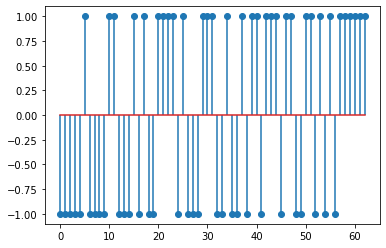

In [19]:
import matplotlib.pyplot as plt

# "Entry parameters" are :
# ValUinit  : Initial steady state
# ValAmpli  : Magnitude              (U)
# ValDecal  : Add-on DC component    
# ValLgReg  : Register length        (N)
# ValDivi   : Frequency divider      (p) --> fprbs = fs/p
# samp      : Number of samples      (L)
# Tappli    : Application instant 

# create_prbs(ValUinit, ValAmpli, ValDecal, ValLgReg, ValDivi, Nsamp, Tappli)

U = 1               # La amplitud del PRBS puede ser pequeña, pero debe ser tal de tener una buena relación señal/ruido  
# U tampoco debe ser tan grande como para poner de manifiesto la dinámica no-lineal del sistema
tr = 0.01
Tprbs = 0.01/5
p = 1               # Divisor de la frecuencia de muestreo, solamente necesaria si N se hace demasiado grande
N = int(tr/Tprbs)+1 # esto es así si p=1, si p>1 --> N=tr/(p*Tprbs)
L = 2**N-1
D = L*Tprbs         # Indicación del tiempo que debe durar el ensayo como mínimo


print(N)
print(L)
print(D) 

prbs = create_prbs(0,U,0,N,p,L,0)

plt.stem(prbs)
# plt.plot(prbs)
plt.show()